In [1]:
%matplotlib inline
import numpy as np
from math import log, sqrt, exp
from scipy import stats
from IPython.display import Image
from IPython.core.display import HTML 
import pandas_datareader as pd_dr
import pandas as pd
import matplotlib.pyplot as plt

#### 1. The expected returns and standard deviation of returns for two securities are as follows:
                                Security Z Security Y
Expected Return                     15%       35%
Standard Deviation                  20%       40%
The correlation between the returns is + .25.

                                              E(Rp) = WzERz + WyERy
                                              

In [2]:
ERz = 0.15
ERy = 0.35
SDz = 0.20
SDy = 0.40
c = 0.25

In [3]:
Wz = [1,0.75,0.5,0.25,0]
Wz = np.asarray(Wz)
Wy = [0,0.25,0.5,0.75,1]
Wy = np.asarray(Wy)

In [4]:
ERp = Wz*ERz + Wy*ERy

In [5]:
ERp

array([ 0.15,  0.2 ,  0.25,  0.3 ,  0.35])

                                Vp = (Wz*SDz)**2 + (Wy*SDy)**2 + 2*Wz*Wy*SDz*SDy*c

In [6]:
Vp = (Wz*SDz)**2 + (Wy*SDy)**2 + 2*Wz*Wy*SDz*SDy*c

In [7]:
SDp = Vp**0.5

In [8]:
SDp

array([ 0.2       ,  0.2       ,  0.24494897,  0.31622777,  0.4       ])

In [9]:
d = {'SD': SDp,'ER': ERp}
MV = pd.DataFrame(d)

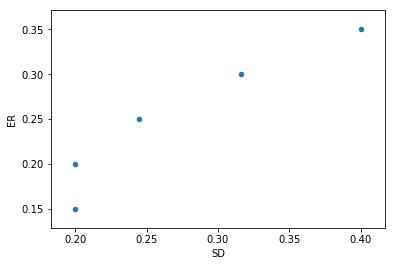

In [10]:
MV.plot.scatter('SD', 'ER')

### 2. Suppose that a fund that tracks the S&P has mean E(Rm) = 16% and standard deviation M = 10%, and suppose that the T-bill rate Rf = 8%. Answer the following questions about efficient portfolios:

#### (a) What is the expected return and standard deviation of a portfolio that is totally invested in the risk-free asset?


The return on the risk free asset is given as 8%. The standard deviation of that
return is 0 by definition, since the asset is risk free.

#### (b) What is the expected return and standard deviation of a portfolio that has 50% of its wealth in the risk-free asset and 50% in the S&P?

In [11]:
w1 = 0.5
w2 = 0.5
ERsnp = 0.16
Rf = 0.08

In [12]:
ERp = w1*ERsnp + w2*Rf

In [13]:
ERp

0.12

In [14]:
SDsnp = 0.1

In [15]:
SDp = w1*SDsnp

In [16]:
SDp

0.05

#### (c) What is the expected return and standard deviation of a portfolio that has 125% of its wealth in the S&P, financed by borrowing 25% of its wealth at the risk-free rate?

In [17]:
w1 = 1.25
w2 = 1 - w1

In [18]:
ERp = w1*ERsnp + w2*Rf

In [19]:
ERp

0.18000000000000002

In [20]:
SDp = w1*SDsnp

In [21]:
SDp

0.125

#### (d) What are the weights for investing in the risk-free asset and the S&P that produce a standard deviation for the entire portfolio that is twice the standard deviation of the S&P? What is the expected return on that portfolio?

We know, SDp = w1*SDsnp
for the risk of the portfolio. The question asks for w1 and w2 that produces
SDp = 2*SDsnp. Substituting SDp for 2SDsnp into the equation gives:

                                                          2SDsnp = w1 * SDsnp

This implies, 

                                                          w1 = 2
Therefore,

                                                          w2 = 1-w1

In [22]:
w1 = 2
w2 = 1-w1

This says the following in words: To produce a portfolio that is twice as risky as
the market, invest double your net worth in S&P (w1 = 2), financed by borrowing
100% of your net worth by selling short the risk-free asset (w2 = -1). To check
that your total risk is double SDsnp, substitute SDsnp = .10 and w1 = 2 into:

In [23]:
SDp = w1*SDsnp

In [24]:
SDp

0.2

In [25]:
ERp = w1*ERsnp + w2*Rf

In [26]:
ERp

0.24

### 3. Consider the following data:

|| Expected Return   | Standard Deviation  |
|------|------|------|
| Russell Fund | 16% | 12% |
| Windsor Fund | 14% | 10% |
| S and P Fund | 12% | 08% |

### The correlation between the returns on the Russell Fund and the S&P Fund is .7. The rate on T-bills is 6%. Which of the following portfolios would you prefer to hold in combination with T-bills and why?

(a) Russell Fund

(b) Windsor Fund

(c) S&P Fund

(d) A portfolio of 60% Russell Fund and 40% S&P Fund.

In [27]:
ERm = [.16, .14, .12]
ERm = np.asarray(ERm)
SDm = [.12, .10, .08]
SDm = np.asarray(SDm)
Rf = .06
SR = (ERm - Rf)/SDm
SR

array([ 0.83333333,  0.8       ,  0.75      ])

In [28]:
wR = 0.6
wSNP = 0.4
ERp = wR * ERm[0] + wSNP * ERm[2]

ERp

0.14400000000000002

In [29]:
C = 0.7
Vp = wR**2*SDm[0]**2 + wSNP**2*SDm[2]**2 + 2*wR*wSNP*SDm[0]*SDm[2]*C
Vp

0.0094336000000000003

In [30]:
SDp = Vp**0.5
SDp

0.097126721348967604

In [31]:
SRp = (ERp - Rf)/SDp
SRp

0.86484953711343293

Since .8648 > .8333 > .8 > .5, the slope for the capital allocation line with the 60-40
mutual fund combination is largest.

## Topic 5: The Capital Asset Pricing Model

### 5. Assume the risk free rate equals Rf = 4%, and the return on the market portfolio has expectation E [RM] = 12% and standard deviation SD = 15%.
#### (a) What is the equilibrium risk premium (that is, the excess return on the market portfolio)?

The equilibrium risk premium is given by:
                     
                                         E[RM] - Rf = 12% - 4% = 8%

#### (b) If a certain stock has a realized return of 14%, what can we say about the beta of this stock?

Nothing. To determine the beta we need to know the expected return, which in
general will not be equal to the realized return.

#### (c) If a certain stock has an expected return of 14%, what can we say about the beta of this stock?

According to CAPM, The expected return is given by
E[R] = Rf + **B**(E[RM] - Rf )

In [32]:
ER = 0.14
Rf = 0.04
ERm = 0.12
B = (ER - Rf)/(ERm - Rf)

In [33]:
B

1.2500000000000002

### 6. You are given the following two equations:

                                                       E(Ri) = Rf + (E(RM) - Rf )***B**                                   (1)
                                                       E(Rp) = Rf +((E(RM) - Rf)/SDm)*SDp                                 (2)

### You also have the following information: E(RM) = .15, Rf = .06, SDm = .15. Answer the following questions, assuming that the capital asset pricing model is correct:
#### (a) Which equation would you use to determine the expected return on an individual security with a standard deviation of returns =.5 and a **B** = 2? Given the parameters above, what is the expected return for that security?

We know that the standard deviation of returns on an individual security (in this
case equal to .5) is not relevant for determining its expected return according to
CAPM since only systematic risk adds to total portfolio risk. Thus only the β
(=2) matters, hence we use equation (1) known as the security market line. With
β = 2 and using the given parameters, we have:

In [34]:
ER = (.06) + (0.15 - 0.06)*(2)

In [35]:
ER

0.24

#### (b) Which equation would you use to determine the expected return on a portfolio knowing that it is an efficient portfolio (consisting of the market portfolio M combined with the risk-free rate)? If you were told that the standard deviation of returns on that portfolio is equal to σM and you were given the above parameters, what is the expected return on that portfolio?

We use equation (2), the capital market line, to determine the expected return on an efficient portfolio consisting of the
market portfolio and the risk-free rate. Equation (2) says the expected return is determined by the σ of the portfolio.
Given that σ = σM and given the parameters above, we have

In [36]:
ER = (0.06) + (0.15 - 0.06)/(0.15)*(.15)

In [37]:
ER

0.15

#### (c) Can you determine the β of the portfolio in (b)?

Since the portfolio in (b) has σ = σM it is the market portfolio. The market
portfolio has a β = 1, by definition. We can also use equation (1) to calculate the
β of the portfolio:

.15 = E(Ri) = .06 + (.15 − .06)β
so β = 1.

#### (d) Given your answers above, expand on what type of risky assets equation (1) can be used for, and what type of risky assets equation (2) can be used for.

Equation (1), the security market line, gives the ”proper” expected return for any
risky asset, whether it is an individual security (that is inefficient by itself) or an efficient risky portfolio. Equation (2), on the other hand, can be used only for the
expected return on an efficient portfolio. This is clear once we recognize that if
we used equation (2) to get the expected return on the individual security from
(a), with a σ = .5, we would have gotten the following:

In [38]:
ER = 0.06 +(0.15 - 0.06)/(0.15)*(0.5)

In [39]:
ER

0.36

The expected return from equation (2) is much too high for the individual security. As we saw in Part A, with a β = 2 equation (1) says this security requires an expected return of ”only” 24%. Part of its total risk (σ = .5) gets diversified away and only the systematic, β-related, risk is priced by the equation (1), the security market line.

# Excel Question. Use the portfolio optimizer posted on the class website. Find out what happens to the share of asset 3 in the optimal risky portfolio in the following cases. Explain in words why you think this happens.
(a) The expected return of asset 3 is increased. (b) The standard deviation of asset 3 is increased. (c) The standard deviation of asset 2 is increased.
(d) The correlation between assets 2 and 5 is increased.

In [40]:
from numpy import matrix, power
from math import sqrt
import numpy as np
from numpy import linalg
import scipy

# The Tangent Portfolio Function uses mean of individual assets, covariance matrix and the risk-free return
# to calculate the weights of the individual assets, the return and standard deviation of the tangency portfolio
# The formula for the tangency portfolio is the inverse of the covariance matrix times the vector of excess returns,
# normalized so that the weights sum to one:

def TangentPortfolio(mu,C,rf):
    # find number of rows and columns for the covariance matrix 
    (nr,nc)=C.shape
    Z  = linalg.inv(C)
    Z2 = Z*(mu-rf)
    Z2 = Z2/sum(Z2[r,0] for r in range(nr))
    w  = Z2.T
    pret = np.dot(w,mu)[0,0]
    psd  = sqrt(np.dot(np.dot(w,C),w.T))
    return matrix(w),pret,psd

In [41]:
mu=matrix([[0.05],[0.166],[0.1],[0.1],[0.12]]) # Inputing mean of individual Assets
rf=0.04 # Inputing Risk-Free rate
sd   = np.array([0.16,0.142,0.174,0.21,0.21]) # Input SD of assets
corr = np.array([[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0],[0,0,0,0,1]]) # Inputing the correlation of the assests

In [42]:
cov  = np.diag(sd.T)*corr*np.diag(sd.T).T # Calculate covariance matrix from correlations and standard deviations
print(cov)

[[ 0.0256    0.        0.        0.        0.      ]
 [ 0.        0.020164  0.        0.        0.      ]
 [ 0.        0.        0.030276  0.        0.      ]
 [ 0.        0.        0.        0.0441    0.      ]
 [ 0.        0.        0.        0.        0.0441  ]]


In [43]:
# Calling the Tangency Portfolio Function to get our results:
wMVE,retMVE,sdMVE=TangentPortfolio(mu,cov,rf)
print("MVE weights:")
print(wMVE)
print("MVE expected return and standard deviation:")
print(retMVE)
print("MVE standard deviation:")
print(sdMVE)

MVE weights:
[[ 0.03311572  0.52974647  0.16800684  0.11534184  0.15378912]]
MVE expected return and standard deviation:
0.136383263378
MVE standard deviation:
0.09039364971095655


In [44]:
# To plot the investment opportunity set, we need to define a function which finds the weights of the global minimum 
# variance portfolio (GMVP).  The risky asset investment opportunity is just the set of combinations of the MVE and 
# GMVP portfolios.

def GMVPortfolio(mu,C,rf):
    # find number of rows and columns for the covariance matrix 
    (nr,nc)=C.shape
    cinv = linalg.inv(C)
    w = np.dot(cinv,np.ones((nr,1)))
    w = w/sum(w[r,0] for r in range(nr))
    #w = w.T
    pret = np.dot(w.T,mu)[0,0]
    psd  = sqrt(np.dot(np.dot(w.T,C),w))
    return matrix(w),pret,psd

In [45]:
# Here are the weights of the GMVP:
wGMVP,retGMVP,sdGMVP=GMVPortfolio(mu,cov,rf)
print("GMVP weights:")
print(wGMVP.T)
print("GMVP expected return:")
print(retGMVP)
print("GMVP standard deviation:")
print(sdGMVP)

GMVP weights:
[[ 0.23385569  0.2969007   0.19773767  0.13575297  0.13575297]]
GMVP expected return:
0.110617720981
GMVP standard deviation:
0.07737380545490466


In [46]:
# We will also need the covariance between the GMVP and MVE portfolios:
covMVE_GMVP = np.dot(np.dot(wMVE,cov),wGMVP)
covMVE_GMVP = covMVE_GMVP[0,0]
print("Covariane between MVE and GMVP:")
print(covMVE_GMVP)

Covariane between MVE and GMVP:
0.00598670577057


In [47]:
# Now we make an array of weights to invest in MVE and GMVP to trace out the risky asset investment opporunity set.
# We also make an array to trace out the CAL of the MVE:
Eret = []
Sret = []
CALret = []
CALsd = []
for i in range(0,100, 1):
    w = 8*i/100-4 # Vary weight from -1 to 2
    Eret.append(w*retMVE + (1-w)*retGMVP)
    Sret.append(sqrt(w**2*sdMVE**2 + (1-w)**2*sdGMVP**2+2*w*(1-w)*covMVE_GMVP))
    v = 2*i/100
    CALret.append(rf+v*(retMVE-rf))
    CALsd.append(v*sdMVE)

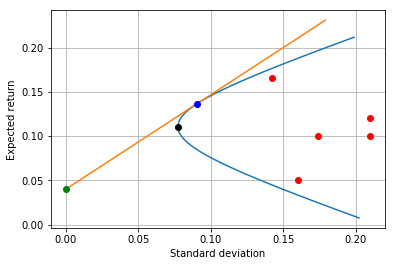

In [48]:
import matplotlib.pyplot as plt

# Plot ranges:
plt.plot(Sret,Eret)
plt.plot(CALsd,CALret)
plt.plot(sd.T,mu,'ro')
plt.plot(sdMVE,retMVE,'--bo')
plt.plot(sdGMVP,retGMVP,'--ko')
plt.plot(0,rf,'--go')
plt.grid(True)
plt.xlabel('Standard deviation')
plt.ylabel('Expected return')
plt.show()